In [1]:
# This notebook assumes:
# the data passed in is a data frame of only numeric values (with one-hot encoding for categorical variables);
# the target variable is binary.


In [2]:
# Modify the values in this paragraph as necessary to run the notebook.
input_directory = "C:/Users/jgbel/Desktop/data/Loan Defaulting/application_train_onehot_imputed.csv"
target_variable = "TARGET"
age_variable = 'DAYS_BIRTH'


In [3]:
import pandas as p
import matplotlib.pyplot as plotter
import seaborn as sns
from collections import Counter
from itertools import chain
import numpy as n
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
data = p.read_csv(input_directory)


In [5]:
# Data Engineering (change this code as necessary)

# Here, we're reformatting the DAYS_BIRTH variable to convert it into years
# (also, for some reason it's negative)
data0 = data
data0[age_variable] = data0[age_variable]/-365

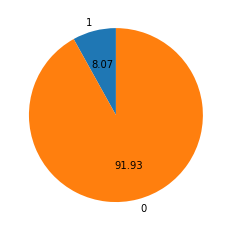

In [6]:
# Display a pie chart to visualize the distribution of our target variable.
# Only run this code if the target variable is categorical in nature, not continuous.
frequency_dictionary = dict(Counter(chain.from_iterable(map(set, data0[target_variable].astype(str).tolist()))))

figureObject, axesObject = plotter.subplots()
axesObject.pie(frequency_dictionary.values(),
               autopct='%1.2f',
               labels = frequency_dictionary.keys(),
               startangle=90)
plotter.show()

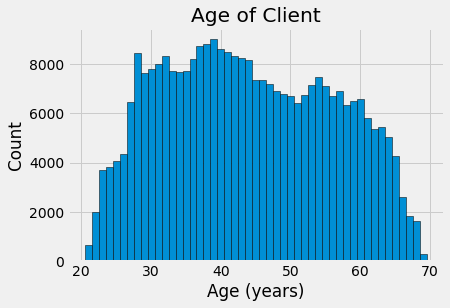

In [7]:
# Visualize age distribution as a histogram.

# Set the style of plots
plotter.style.use('fivethirtyeight')
# Plot the distribution of ages in years
plotter.hist(data0[age_variable], edgecolor = 'k',\
            bins = n.arange(min(data0[age_variable]), max(data0[age_variable]) + 1, 1))
plotter.title('Age of Client'); plotter.xlabel('Age (years)'); plotter.ylabel('Count');


C:\Users\jgbel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


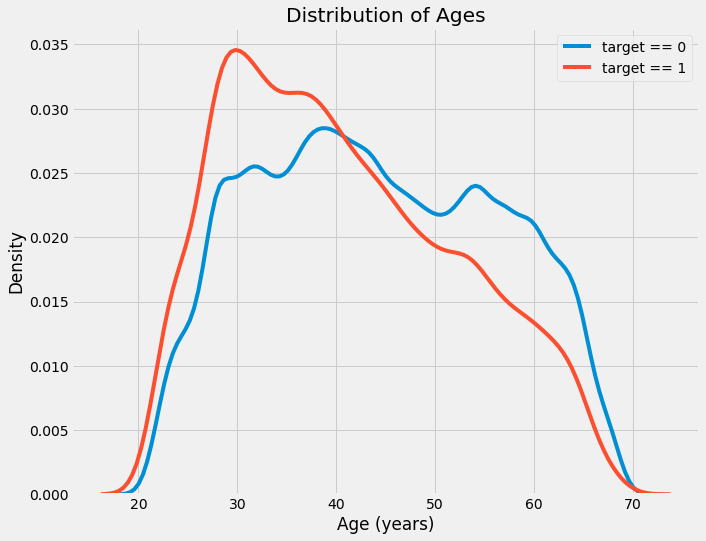

In [8]:
# Visualize age distribution by target value.
plotter.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data0.loc[data0[target_variable] == 0, age_variable], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data0.loc[data0[target_variable] == 1, age_variable], label = 'target == 1')

# Labeling of plot
plotter.xlabel('Age (years)'); plotter.ylabel('Density'); plotter.title('Distribution of Ages');


In [9]:
# To determine which predictors are most important for our target variable,
# we will build a random forest and then print out the variable importance report.

In [10]:
# Split the data frame into training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    data0.drop(target_variable, axis = 1),
    data0[target_variable],
    test_size = 0
)


In [11]:
# Make the random forest classifier.
random_forest = RandomForestClassifier(n_estimators = 100, verbose = 1, n_jobs = -1)
# Train the random forest on the training data.
random_forest.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [12]:
# Display the top 10 most important predictors, in descending order of importance
features = X_train.columns
feature_importance_values = random_forest.feature_importances_
feature_importances = p.DataFrame({'Feature': features, 'Importance': feature_importance_values})
feature_importances.sort_values(by = 'Importance', ascending = False).head(10).style.hide_index()


Feature,Importance
EXT_SOURCE_2,0.0487044
EXT_SOURCE_3,0.0447198
DAYS_BIRTH,0.0316989
DAYS_ID_PUBLISH,0.0311808
DAYS_REGISTRATION,0.0304946
SK_ID_CURR,0.0294877
AMT_ANNUITY,0.0285182
DAYS_EMPLOYED,0.0273695
DAYS_LAST_PHONE_CHANGE,0.0272051
AMT_CREDIT,0.0267652
